In [1]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import models,layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
fashion_mnist=keras.datasets.fashion_mnist

In [4]:
(X_train, y_train),(X_test,y_test)=fashion_mnist.load_data()

In [5]:
X_train=X_train/255.0
X_test=X_test/255.0

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train=X_train.reshape(len(X_train),28,28,1)

In [8]:
X_test=X_test.reshape(len(X_test),28,28,1)

In [9]:
cnn= models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10, activation='softmax')
    
])

In [10]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

In [11]:
cnn.fit(X_train,y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 218us/sample - loss: 0.4612 - accuracy: 0.8343
Epoch 2/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.3124 - accuracy: 0.8860 - loss: 0.3356 - accuracy
Epoch 3/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.2680 - accuracy: 0.9012 - l
Epoch 4/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.2364 - accuracy: 0.9123
Epoch 5/10
60000/60000 [==============================] - 12s 198us/sample - loss: 0.2110 - accuracy: 0.9207
Epoch 6/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.1914 - accuracy: 0.9293
Epoch 7/10
60000/60000 [==============================] - 9s 148us/sample - loss: 0.1727 - accuracy: 0.9360
Epoch 8/10
60000/60000 [==============================] - 10s 169us/sample - loss: 0.1555 - accuracy: 0.9409
Epoch 9/10
60000/60000 [==============================] - 11s 180us/sample - los

In [12]:
score=cnn.evaluate(X_test, y_test, verbose=0)

In [13]:
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9082


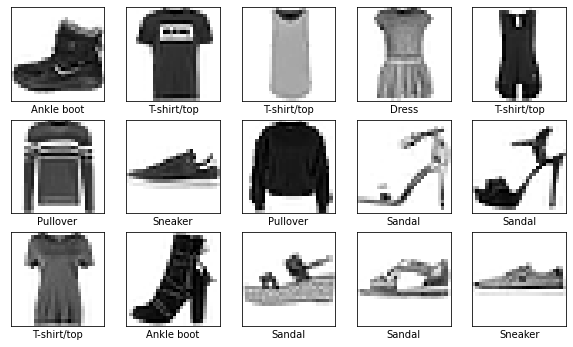

In [14]:
# Let us plot some training images to see how they look
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])
plt.show()

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred=cnn.predict(X_test)
y_classes=[np.argmax(element) for element in y_pred]

In [16]:
y_classes[:5]

[9, 2, 1, 1, 6]

In [17]:
print("Classification_Report:\n", classification_report(y_test, y_classes))

Classification_Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.84      0.88      0.86      1000
           3       0.91      0.91      0.91      1000
           4       0.84      0.88      0.86      1000
           5       0.97      0.99      0.98      1000
           6       0.75      0.72      0.73      1000
           7       0.97      0.93      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.95      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

